# Geometric and 3D Computer Vision
## Introduction to numpy and opencv

Python stores data in several different ways, but the most popular methods are

* Lists

```[1, [2, 'three'], 4.5] , list(range(10))```

* Dictionaries

```{'food': 'spam', 'taste': 'yum'} , dict(hours=10)```

Both can store nearly any type of Python object as
an element. But operating on the elements in a list can only be done through iterative loops, which is computationally inefficient in Python

---

## NumPy

Numpy package provide the ndarray data object representing a multidimensional array of homogeneous data (same type) 
mathematically known as tensor
ndarray contains also metadata about the array

In [4]:
!pip3 install numpy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 2.8 MB/s eta 0:00:0000:0100:01


In [5]:
import numpy as np

Some useful properties and methods:

In [6]:
print( np.ndarray.ndim.__doc__ )

Number of array dimensions.

    Examples
    --------
    >>> x = np.array([1, 2, 3])
    >>> x.ndim
    1
    >>> y = np.zeros((2, 3, 4))
    >>> y.ndim
    3


In [7]:
print( np.ndarray.size.__doc__ )

Number of elements in the array.

    Equal to ``np.prod(a.shape)``, i.e., the product of the array's
    dimensions.

    Notes
    -----
    `a.size` returns a standard arbitrary precision Python integer. This
    may not be the case with other methods of obtaining the same value
    (like the suggested ``np.prod(a.shape)``, which returns an instance
    of ``np.int_``), and may be relevant if the value is used further in
    calculations that may overflow a fixed size integer type.

    Examples
    --------
    >>> x = np.zeros((3, 5, 2), dtype=np.complex128)
    >>> x.size
    30
    >>> np.prod(x.shape)
    30


In [8]:
print( np.ndarray.nbytes.__doc__ )

Total bytes consumed by the elements of the array.

    Notes
    -----
    Does not include memory consumed by non-element attributes of the
    array object.

    See Also
    --------
    sys.getsizeof
        Memory consumed by the object itself without parents in case view.
        This does include memory consumed by non-element attributes.

    Examples
    --------
    >>> x = np.zeros((3,5,2), dtype=np.complex128)
    >>> x.nbytes
    480
    >>> np.prod(x.shape) * x.itemsize
    480


In [9]:
print( np.ndarray.shape.__doc__ )

Tuple of array dimensions.

    The shape property is usually used to get the current shape of an array,
    but may also be used to reshape the array in-place by assigning a tuple of
    array dimensions to it.  As with `numpy.reshape`, one of the new shape
    dimensions can be -1, in which case its value is inferred from the size of
    the array and the remaining dimensions. Reshaping an array in-place will
    fail if a copy is required.

    .. warning::

        Setting ``arr.shape`` is discouraged and may be deprecated in the
        future.  Using `ndarray.reshape` is the preferred approach.

    Examples
    --------
    >>> x = np.array([1, 2, 3, 4])
    >>> x.shape
    (4,)
    >>> y = np.zeros((2, 3, 4))
    >>> y.shape
    (2, 3, 4)
    >>> y.shape = (3, 8)
    >>> y
    array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])
    >>> y.shape = (3, 6)
    Traceback (most rec

## Data types

Basic numerical data types supported:

* int8
* int16
* int32
* int64
* uint8
* uint16
* uint32
* uint64
* Bool
* float16
* float32
* float64
* float128
* complex64
* complex128
* complex256

Once created, the dtype of an array cannot be changed. The method astype(dtype) can be used to __get a copy__ of the original array with a different datatype.

In [10]:
print( np.ndarray.astype.__doc__ )

a.astype(dtype, order='K', casting='unsafe', subok=True, copy=True)

    Copy of the array, cast to a specified type.

    Parameters
    ----------
    dtype : str or dtype
        Typecode or data-type to which the array is cast.
    order : {'C', 'F', 'A', 'K'}, optional
        Controls the memory layout order of the result.
        'C' means C order, 'F' means Fortran order, 'A'
        means 'F' order if all the arrays are Fortran contiguous,
        'C' order otherwise, and 'K' means as close to the
        order the array elements appear in memory as possible.
        Default is 'K'.
    casting : {'no', 'equiv', 'safe', 'same_kind', 'unsafe'}, optional
        Controls what kind of data casting may occur. Defaults to 'unsafe'
        for backwards compatibility.

          * 'no' means the data types should not be cast at all.
          * 'equiv' means only byte-order changes are allowed.
          * 'safe' means only casts which can preserve values are allowed.
          * 's

### Tensors

Multidimensional arrays are stored as __contiguous data__ in memory. There is a freedom of choice in how to arrange the elements in the array memory segment

In [11]:
A = np.array([[1, 2], [3, 4], [5,6]], order="C" )  # Creates an array in row-major format
print(A.flags)
print(A.shape)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

(3, 2)


In [ ]:
A = np.array([[1, 2], [3, 4], [5,6]], order="F" ) # Creates an array in row-major format
print(A.flags)
print(A.shape)

Note how the order parameter affects only how the tensor is stored in memory and not its shape. It only has an impact on the performances.

### Strides

Row-major and column-major ordering are special cases of strategies (2D case) for mapping the index used to address an element, to the offset for the element in the array’s memory

In the general case, such mapping is defined by the **strides** attribute:

strides = tuple of the same length as the number of axes of the array. Each value is the factor by which the index for the corresponding axis is multiplied when calculating the memory offset (in bytes) for a given index expression.

In [12]:
A = np.array([[1, 2, 3, 4], [5,6,7,8], [9,10,11,12]], dtype=np.int32, order="C" )
print(A)
print(A.shape)
print(A.strides)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(3, 4)
(16, 4)


Each increment of **n** in ```A[m,n]``` increase the memory offset by 4 bytes.

Each increment of **m** in ```A[m,n]``` increase the memory offset by 16 bytes

In [13]:
A = np.array([[1, 2, 3, 4], [5,6,7,8], [9,10,11,12]], dtype=np.int32, order="F" )
print(A)
print(A.shape)
print(A.strides)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(3, 4)
(4, 12)


Each increment of **n** in ```A[m,n]``` increase the memory offset by 12 bytes.

Each increment of **m** in ```A[m,n]``` increase the memory offset by 4 bytes

**Note:** When we print the two arrays they look exactly the same. Order affects only their memory layout.

### Strides and Views

Strides is a smart way to implement reshaping operations like the transpose without moving data in memory: numpy just changes the stride attribute!

Operations that only require changing the strides attribute result in new ndarray object that refer to the same data as the original array. Such arrays are called views.

* Modifying data on a view modifies data in the original array
* Data may not be contiguous in memory (important when interfacing with C libraries)


In [14]:
A = np.array([[1, 2, 3, 4], [5,6,7,8], [9,10,11,12]], dtype=np.int32, order="C" )
print(A)
print("Shape: ",A.shape)
print("Strides: ",A.strides)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Shape:  (3, 4)
Strides:  (16, 4)


In [15]:
B = A.T
print(B)
print("Shape: ",B.shape)
print("Strides: ",B.strides)

[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]
Shape:  (4, 3)
Strides:  (4, 16)


In [16]:
B[0,0] = 1000
print(A)

[[1000    2    3    4]
 [   5    6    7    8]
 [   9   10   11   12]]


### Creating arrays

From Python iterables

In [17]:
A = np.array([[1, 2, 3, 4], [5,6,7,8], [9,10,11,12]] )
print(A)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


---
Filled with zeros or ones:

In [18]:
A = np.zeros( (3,4), dtype=np.float32 )
print(A)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [19]:
A = np.ones( (3,4), dtype=np.float32 )
print(A)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


---
Diagonal matrix given a list of elements:

In [20]:
A = np.diag( [1,3,3,5] )
print(A)

[[1 0 0 0]
 [0 3 0 0]
 [0 0 3 0]
 [0 0 0 5]]


---
One-dimensional array of elements in a range:

In [21]:
A = np.arange( 5, 20, 2, dtype=np.float32 )
print(A)

[ 5.  7.  9. 11. 13. 15. 17. 19.]


One-dimensional array of elements equispaced in a range:

In [22]:
A = np.linspace( 5, 20, num=30, dtype=np.float32 )
print(A)

[ 5.         5.5172415  6.034483   6.551724   7.0689654  7.586207
  8.103448   8.620689   9.137931   9.655172  10.172414  10.689655
 11.206897  11.724138  12.24138   12.75862   13.275862  13.793103
 14.310345  14.827586  15.344828  15.862069  16.37931   16.896551
 17.413794  17.931034  18.448277  18.965517  19.48276   20.       ]


---
Coordinate matrices from one dimensional coordinate vectors:

In [23]:
XX, YY = np.meshgrid( np.arange(4), np.arange(3) )
print("XX:\n", XX)
print("YY:\n", YY)

print("Coordinates: ")
for ii in range( XX.shape[0] ):
    for jj in range( XX.shape[1] ):
        print( "%d %d"%(XX[ii,jj], YY[ii,jj] ))

XX:
 [[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
YY:
 [[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]]
Coordinates: 
0 0
1 0
2 0
3 0
0 1
1 1
2 1
3 1
0 2
1 2
2 2
3 2


### Indexing and slicing

* Integers are used to select single elements
* Slices are used to select ranges and sequences of elements (```m:n:s``` notation selects elements from m to n-1 with stride s). 
* Positive integers are used to index elements from the beginning of the array (index starts at 0)
* Negative integers are used to index elements from the end of the array, where the last element is indexed with –1

**Note: indexing and slicing create views of the original arrays!**


In [24]:
A = np.array([[1, 2, 3, 4], [5,6,7,8], [9,10,11,12]] )
print(A)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [25]:
A[1,2] # Selects a single element 

7

In [26]:
A[0,-1] # Negative indices select elements from the end

4

In [27]:
A[0:2,:] # Selects rows from 0 (included) to 2 (excluded) and all the columns

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [28]:
A[:,0::2] # Selects all rows and columns from 0 to end with stride 2

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

In [29]:
A[:,::-1] # Selects all rows and columns from 0 to end with stride -1 (ie. counting backward!)

array([[ 4,  3,  2,  1],
       [ 8,  7,  6,  5],
       [12, 11, 10,  9]])

### Fancy and boolean indexing

An array can be indexed with another NumPy array, a Python list, or a sequence of integers, whose
values select elements in the indexed array

In Boolean indexing, each element (with values True or False) indicates whether to select the
element from the list with the corresponding index

Arrays returned using fancy indexing and Boolean-valued indexing **are not views but rather new independent arrays**

In [30]:
A = np.arange(5,20,1)
print(A)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [31]:
indices = np.array([0,7,1,4])
print(indices)

[0 7 1 4]


In [32]:
B = A[indices] # fancy indexing creates a copy
print("B =",B)
B[0] = 40
print("A =",A) # A is not modified!

B = [ 5 12  6  9]
A = [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [33]:
b_indices = np.array([ True, False, True, True, True, False, True, False, True, True, True, True, False, False, False])
assert b_indices.size == A.size

B = A[b_indices]
print(B)

[ 5  7  8  9 11 13 14 15 16]


### Reshaping and Resizing

```np.reshape``` Reshapes an N-dimensional array creating a view. The total number of elements must remain the same.

In [34]:
A = np.arange(5,20,1)
print(A)
print( np.reshape( A, (5,3), order="C" ) )

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[[ 5  6  7]
 [ 8  9 10]
 [11 12 13]
 [14 15 16]
 [17 18 19]]


In [35]:
print( np.reshape( A, (5,3), order="F" ) )

[[ 5 10 15]
 [ 6 11 16]
 [ 7 12 17]
 [ 8 13 18]
 [ 9 14 19]]


In [36]:
print( np.reshape( A, (3,5) ) )

[[ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


---
```np.flatten``` Creates a ***copy** of an N-dimensional array, and reinterpret it as a one-dimensional array (i.e., all dimensions are collapsed into one)

In [37]:
A = np.array([[1, 2, 3, 4], [5,6,7,8], [9,10,11,12]] )
print(A)
B = A.flatten()
print(B)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


```np.ravel``` does the same thing but trying to create a ***view** (possible only if values are contiguous in memory)

In [38]:
print(A)
B = np.ravel(A)
print("")
print(B)
B[0] = 100
print("")
print(A)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

[ 1  2  3  4  5  6  7  8  9 10 11 12]

[[100   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]


---
```np.squeeze``` removes axes with length==1

In [39]:
A = np.array([[[1, 2, 3, 4], [5,6,7,8], [9,10,11,12]]] )
print(A)
print(A.shape)

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]]
(1, 3, 4)


In [40]:
B = np.squeeze(A)
print(B)
print(B.shape)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(3, 4)


---
```np.expand_dims( <array>, axis=<n> )``` is the inverse of ```squeeze```: adds new axis of length 1 in the array at position <n>

In [41]:
A = np.arange(10)
print(A.shape)

(10,)


In [42]:
B = np.expand_dims(A, axis=0 )
print(B.shape)

(1, 10)


In [43]:
B = np.expand_dims(A, axis=-1 )
print(B.shape)

(10, 1)


---
```np.concatenate``` Creates a new array by appending arrays after each other, along a given axis. (Dimensions must match accordingly)

In [44]:
A = np.zeros( (3,2) )
print(A)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [45]:
B = np.ones( (3,5 ) )
print(B)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [46]:
C = np.concatenate( [A,B], axis=1 )
print(C)

[[0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1.]]


### Vectorized expressions and broadcasting

NumPy implements functions and vectorized operations corresponding to most fundamental mathematical functions and operators

See the [documentation](https://docs.scipy.org/doc/numpy/reference/routines.math.html)

Most of these functions and operations act on arrays on an **elementwise basis**

In [47]:
x = np.ones( (3,2) )
print(x)

[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [48]:
y = np.reshape( np.arange(6), (3,2) )
print(y)

[[0 1]
 [2 3]
 [4 5]]


In [49]:
print(x+y)

[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [50]:
print( np.sin(x) )

[[0.84147098 0.84147098]
 [0.84147098 0.84147098]
 [0.84147098 0.84147098]]


### What if the input arrays have different shapes? 

Two arrays are called **broadcastable** if one of the following is true:
    
1. The arrays all have exactly the same shape.
2. The arrays have the same number of dimensions, and the length of each dimension is either a common length or 1.
3. The arrays that have too few dimensions can have their shapes **prepended** with a dimension of length 1 to satisfy property 2.


In [51]:
def is_broadcastable(src, dst):
    try:
        src + dst
        return True
    except ValueError:
        return False

In [52]:
A = np.zeros( (3,2) )
B = np.ones( (3,2) )
C = np.zeros( (3,1) )
D = np.zeros( (1,3) )
E = np.zeros( (2) )

In [53]:
is_broadcastable(A,B) # Rule 1

True

In [54]:
is_broadcastable(A,C) # Rule 2

True

In [55]:
is_broadcastable(A,D)

False

In [56]:
is_broadcastable(A,E) # Rule 3

True

### How broadcasting works:

* If the number of axes of the two arrays is not equal, the array with fewer axes is padded with new axes of length 1 from the left until the numbers of dimensions of the two arrays agree.

* If an input has a dimension size of 1 in its shape, the first data entry in that dimension will be used for all calculations along that dimension. In other words, the stride will be 0 for that dimension and the numbers are hence repeated.

* Operations are then performed element-wise!

In [57]:
A = np.array( [[1,2,3],[4,5,6],[7,8,9]] )
B = np.array( [[1,2,5],[3,2,1],[7,1,3]] )
print(A)
print()
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1 2 5]
 [3 2 1]
 [7 1 3]]


Simple case, A and B have the same shape. Operations are performed element-wise

In [58]:
print(A+B)

[[ 2  4  8]
 [ 7  7  7]
 [14  9 12]]


Case in which an input has size 1 in its shape. 

In [59]:
C = np.array([[1],[3],[7]])
print(C)
print("C.shape=",C.shape)

[[1]
 [3]
 [7]]
C.shape= (3, 1)


When doing broadcasting, the singleton dimension (axis=1 in this case= is repeated to match the size of the other array:
    
```
[[1]          [[1 3 7],
 [3]     ->    [1 3 7],
 [7]]          [1 3 7]]
```

In [60]:
print(A+C)

[[ 2  3  4]
 [ 7  8  9]
 [14 15 16]]


In the case in which the two operands does not have the same shape, check if the smaller can match the bigger by prepending the required amount of singleton dimensions

In [61]:
D = np.array( [1,2,2] )
print(D)
print("D.shape=",D.shape)

[1 2 2]
D.shape= (3,)


If we prepend a singleton dimension to D, its shape will be (1,3) which is broadcastable with A.shape==(3,3). So, the performed operation will be:

```
            [ [ 1 2 2 ],
[1 2 2]  ->   [ 1 2 2 ],
              [ 1 2 2 ] ]
```

In [62]:
A+D

array([[ 2,  4,  5],
       [ 5,  7,  8],
       [ 8, 10, 11]])

When we perform an operation between an array and a scalar, broadcasting works "under the hood", effectively repeating the element to match the shape of the other operand.

```
A + 3:


[[1 2 3]    +  [3]   =   [[ 1 2 3]    +   [[ 3 3 3]
 [4 5 6]                  [ 4 5 6]         [ 3 3 3]
 [7 8 9]]                 [ 7 8 9]]        [ 3 3 3]]
```

And what about this case?

In [63]:
print(A)
print("A.shape=",A.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
A.shape= (3, 3)


In [64]:
E = np.array( [1,2] )
print(E)
print("E.shape", E.shape)

[1 2]
E.shape (2,)


In [65]:
A * E 

ValueError: operands could not be broadcast together with shapes (3,3) (2,) 

### Linear Algebra

In [66]:
A = np.ones( (3,3) )+np.eye(3) # element-wise sum (broadcasting applies)
print(A)

[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]


In [67]:
B = np.diag( (2,2,1) )
print(B)

[[2 0 0]
 [0 2 0]
 [0 0 1]]


In [68]:
A*B # element-wise multiplication (broadcasting applies)

array([[4., 0., 0.],
       [0., 4., 0.],
       [0., 0., 2.]])

In [69]:
A@B # matrix multiplication

array([[4., 2., 1.],
       [2., 4., 1.],
       [2., 2., 2.]])

In [70]:
(A@B).T # transpose

array([[4., 2., 2.],
       [2., 4., 2.],
       [1., 1., 2.]])

Solve a linear system:

In [71]:
b = np.array([1,3,2])

In [72]:
print( np.linalg.solve(A,b))

[-0.5  1.5  0.5]


---

## OpenCV

[OpenCV](https://docs.opencv.org/4.6.0/) is an open-source library that includes several hundreds of computer vision algorithms. OpenCV has a modular structure, which means that the package includes several shared or static libraries. 

[List of available modules](https://docs.opencv.org/4.6.0/modules.html)

Let's download an image first to get started!

In [73]:
! wget -nc "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png" -O lenna.png

--2023-06-26 16:17:19--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.58.240, 2a02:ec80:600:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.58.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lenna.png’

lenna.png           100%[===================>] 462,73K  1,59MB/s    in 0,3s    

2023-06-26 16:17:20 (1,59 MB/s) - ‘lenna.png’ saved [473831/473831]



In [76]:
!pip3 install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 2.1 MB/s eta 0:00:0000:0100:01


In [77]:
import cv2 as cv

Load an image in grayscale

In [78]:
I = cv.imread("lenna.png", cv.IMREAD_GRAYSCALE)

In [79]:
I

array([[169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       ...,
       [ 53,  53,  59, ..., 115, 112, 114],
       [ 53,  53,  64, ..., 117, 118, 122],
       [ 53,  53,  64, ..., 117, 118, 122]], dtype=uint8)

In [80]:
I.shape

(512, 512)

We can use matplotlib to visualize an array inside a notebook

In [83]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 KB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 2.0 MB/s eta 0:00:0000:0100:01
  Using cached kiwisolver-1.4.4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [84]:
import matplotlib.pyplot as plt

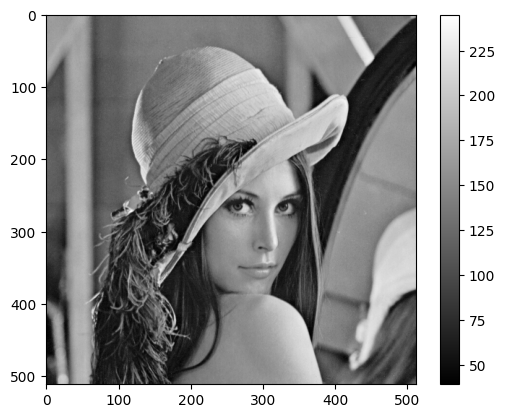

In [85]:
plt.figure( )
plt.imshow( I, cmap="gray" )
plt.colorbar()

Load color image

In [86]:
I = cv.imread("lenna.png", cv.IMREAD_COLOR)

In [ ]:
# Image format is Width x Height x Depth (depth is typically the last dimension)

In [87]:
I.shape

(512, 512, 3)

Show the color image

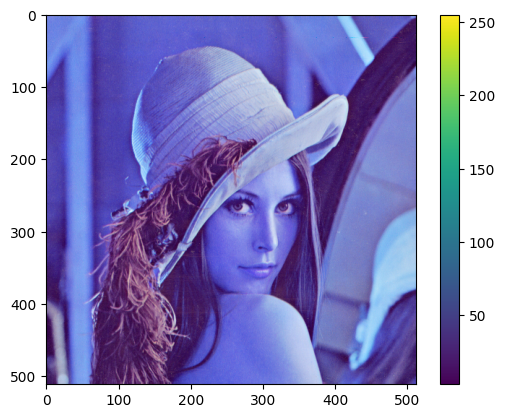

In [88]:
plt.figure( )
plt.imshow( I)
plt.colorbar()

Default OpenCV format is BGR not RGB... How can we convert to RGB?

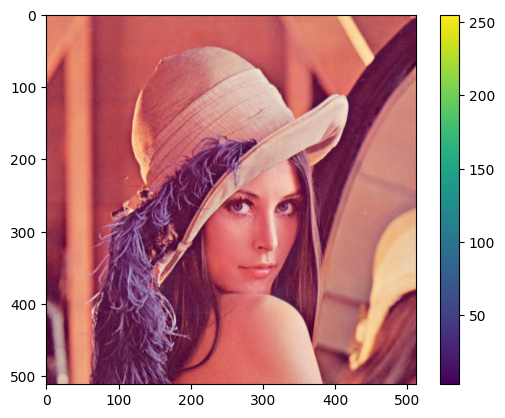

In [89]:
Irgb = I[:,:,::-1]
plt.figure( )
plt.imshow( Irgb )
plt.colorbar()

In [90]:
!rm lenna.png